<img style="float:right;width:100px" src="https://enib.fr/images/logo-enib-accueil.jpg">
<div><h3>Labo de méthodes numériques S5, automne 2020</h3>
      
</div>
<div style="text-align:center;padding-bottom:20px;padding-top:10px">
    <h1> TP 2 : codage de méthodes classiques </h1>
    <h1> Tests sur problèmes raides </h1>
</div>
    

In [53]:
#Evite d'utiliser show :
%matplotlib inline 
#les bons modules :
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact
import scipy.optimize as opt
#On centre les figures :
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: right;
    vertical-align: middle;
}
</style>
""")
#On change la taille des figures
plt.rcParams['figure.figsize'] = [12, 8]

from ipywidgets import interact_manual
from ipywidgets import FloatSlider

# Exercice 1 : codage

Coder les méthodes d'Euler (explicite), d'Euler implicite et de Runge-Kutta d'ordre 4 (RK4) pour un problème de Cauchy quelconque et en dimension quelconque. Les arguments seront, outre la fonction $f$ du problème $y'=f(t,y)$, la discrétisation $t$ de l'intervalle d'intégration et la condition initiale $y_0$. Pour la méthode d'Euler implicite, on utilisera la commande <i>optimize.broyden1</i> pour la résolution d'une équation non linéaire.

A chaque fois, on renverra la matrice solution (approchée). On testera ces méthodes sur le problème $$y''(t)=-sin(y(t)),~y(0)=0,y'(0)=1$$ en affichant les courbes approchées de $(z(t),z'(t))$ où $z$ est la solution exacte du problème (on comparera avec la courbe obtenue par $\texttt{odeint}$)

[[0.         1.        ]
 [0.01       1.        ]
 [0.02       0.9999    ]
 ...
 [1.38831763 0.69653119]
 [1.39528294 0.68669722]
 [1.40214991 0.67685085]]


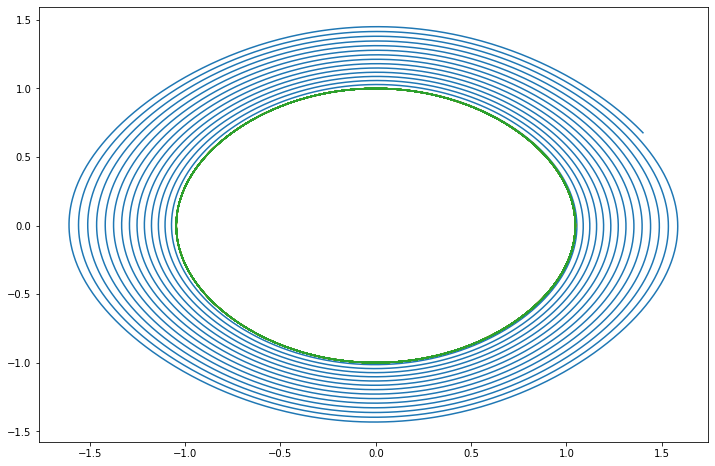

In [54]:
def euler(f,u0,t):
    M=np.zeros((len(t),len(u0)))
    M[0,:]=u0
    for n in range (len(t)-1):
        hn = t[n+1] - t[n]
        M[n+1,:] = M[n,:] + hn*f(M[n,:], t[n])
        
    return M
    
    
def RK4(f,u0,t):
    M=np.zeros((len(t),len(u0)))
    M[0,:]=u0

    for i in range(len(t)-1):
        h = t[i+1] - t[i]
        Y1 = M[i,:] 
        Y2= Y1+h/2*f(Y1,t[i])
        Y3= Y1+h/2*f(Y2,t[i]+h/2)
        Y4=Y1+h*f(Y3,t[i+1])
        M[i+1,:]=M[i,:]+h/6*(f(Y1,t[i])+2*f(Y2,t[i]+h/2)+2*f(Y3,t[i]+h/2)+f(Y4,t[i+1]))
    return M


u0 = [0,1]
t=np.arange(0,100,0.01)
def f(u,t):
    return np.array([u[1],-np.sin(u[0])])



Y_odeint1=odeint(f,u0,t)
test_euler=euler(f,u0,t)
test_RK4=RK4(f,u0,t)
print(test_euler)
plt.plot(test_euler[:,0],test_euler[:,1])
plt.plot(test_RK4[:,0],test_RK4[:,1])
plt.plot(Y_odeint1[:,0],Y_odeint1[:,1])


    

# Exercice 2 : Un problème de Curtiss-Hirschfelder


C. F. Curtiss et J. O. Hirschfelder proposent un ensemble d'exemples d'équations différentielles
raides. Ce sont les équations de la forme :
$$
y'(t)=-k(y(t)-\Phi(t))
$$
où $k\in\mathbb R^+$ et $\Phi$ est une fonction. Ces équations ont la caractéristique commune de pr\'esenter deux échelles de temps. On trouve un comportement global proche de la fonction $\Phi$ mais, sur un faible intervalle de temps, une progression de la forme $e^{-kt}$ qui ramène très rapidement toute valeur éloignée de la courbe de $\Phi$ vers cette dernière.

On considère ici le cas suivant : 
Soit $\varepsilon$ un paramètre proche de $0$. On considère l'équation suivante :
$$
\varepsilon y'(t) = - y(t) + \cos(t) \quad (E)
$$
### Question 1

En fixant des valeurs de $\varepsilon$ ($10^{-2}$, $10^{-3}$ par exemple), tracer quelques champs de vecteurs associés à l'équation (commande $\texttt{champ}$).

### Question 2

 Montrer que la solution générale de l'équation est de la forme :
	$$
	z(t) = C e^{-\frac{t}{\varepsilon}} + \frac{ \cos(t)+\varepsilon \sin(t)}{1+\varepsilon^2}
	$$
où $C$ est une constante d'intégration.
	

### Question 3 

On s'intéresse à présent au problème de Cauchy pour lequel $z(0)=2$, et on souhaite représenter $z$ sur l'intervalle $[0,2]$. Déterminer $C$ pour résoudre ce problème.


### Question 4

En s'intéressant à la partie homogène de l'équation ($y'=\frac{y}{\varepsilon}$), déterminer la condition que doit vérifier $\frac{h}{\varepsilon}$ pour que l'approximation de la solution de cette équation par la méthode d'Euler explicite tende bien vers $0$ lorsque $t$ tend vers $+ \infty$ (étude de la stabilité absolue de la m\'ethode d'Euler avec $\lambda = \frac{1}{\varepsilon}$).


### Question 5

Utiliser la méthode d'Euler explicite et résoudre numériquement l'équation $(E)$. On tracera sur un même graphe la solution exacte et la solution approchée. Faire varier la valeur de $h$ pour vérifier les résultats de la question précédente.

### Question 6
Même question avec la méthode RK4.

### Question 7


Utiliser la méthode d'Euler implicite et comparer enfin les résultats donnés par les différentes méthodes pour différents pas.